In [88]:
import pandas as pd

import utils as u
from config.GLOBAL import *

In [89]:
# tract_20_10 = pd.read_csv("config/tab20_tract20_tract10_st53.txt", delimiter="|", usecols=["GEOID_TRACT_20", "GEOID_TRACT_10"], index_col="GEOID_TRACT_20")
tract_20_10 = pd.read_csv("config/tab20_tract20_tract10_st53.txt", delimiter="|")
tract_20_10["FRACTION"] = tract_20_10["AREALAND_PART"]/tract_20_10["AREALAND_TRACT_20"]
#catch the water-only census tracts
for ind,row in tract_20_10.loc[tract_20_10["FRACTION"].isna()].iterrows():
    tract_20_10.loc[ind, "FRACTION"] = tract_20_10.loc[ind, "AREAWATER_PART"]/tract_20_10.loc[ind, "AREAWATER_TRACT_20"]
tract_20_10

,OID_TRACT_20,GEOID_TRACT_20,NAMELSAD_TRACT_20,AREALAND_TRACT_20,AREAWATER_TRACT_20,MTFCC_TRACT_20,FUNCSTAT_TRACT_20,OID_TRACT_10,GEOID_TRACT_10,NAMELSAD_TRACT_10,AREALAND_TRACT_10,AREAWATER_TRACT_10,MTFCC_TRACT_10,FUNCSTAT_TRACT_10,AREALAND_PART,AREAWATER_PART,FRACTION
0,20790225757139,53001950100,Census Tract 9501,1615246453,7701924,G5020,S,20740225757139,53001950100,Census Tract 9501,1615379080,7701924,G5020,S,1615185150,7701924,0.999962
1,20790225757139,53001950100,Census Tract 9501,1615246453,7701924,G5020,S,20740480264312,53043960400,Census Tract 9604,2659105111,12808774,G5020,S,12825,0,0.000008
2,20790225757139,53001950100,Census Tract 9501,1615246453,7701924,G5020,S,20740256954118,53075000900,Census Tract 9,2053443772,11728753,G5020,S,48478,0,0.000030
3,20790225757084,53001950200,Census Tract 9502,2629354892,2148452,G5020,S,20740225757084,53001950200,Census Tract 9502,2629585982,2151218,G5020,S,2629148339,2137958,0.999921
4,20790225757084,53001950200,Census Tract 9502,2629354892,2148452,G5020,S,20740246568089,53021020700,Census Tract 207,1408199208,30711543,G5020,S,148183,783,0.000056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3073,20790483254622,53077940003,Census Tract 9400.03,4621265520,3847213,G5020,S,20740483254622,53077940003,Census Tract 9400.03,4624030592,3847213,G5020,S,4621208312,3847213,0.999988
3074,207903716948425,53077940005,Census Tract 9400.05,5135226,0,G5020,S,207403716948425,53077940005,Census Tract 9400.05,5135226,0,G5020,S,5135226,0,1.000000
3075,207903716948423,53077940006,Census Tract 9400.06,4504123,0,G5020,S,207403716948423,53077940006,Census Tract 9400.06,4504123,0,G5020,S,4504123,0,1.000000
3076,2079015504443611,53077940007,Census Tract 9400.07,5016436,0,G5020,S,20740483254628,53077940004,Census Tract 9400.04,8368093,0,G5020,S,5016436,0,1.000000


In [12]:
53009000200 in tract_20_10["GEOID_TRACT_10"].values
vals = tract_20_10.loc[tract_20_10["GEOID_TRACT_10"] == 53009000200, "GEOID_TRACT_20"].values
vals

array([53009002400, 53009940000], dtype=int64)

In [20]:
53009002400 in census_tracts_2020
53009002400 in df.index
# 53009940000 in census_tracts_2020
53009940000 in df.index

True

In [5]:
tract_20_10.shape

(3078, 17)

In [6]:
tract_20_10.dtypes

OID_TRACT_20            int64
GEOID_TRACT_20          int64
NAMELSAD_TRACT_20      object
AREALAND_TRACT_20       int64
AREAWATER_TRACT_20      int64
MTFCC_TRACT_20         object
FUNCSTAT_TRACT_20      object
OID_TRACT_10            int64
GEOID_TRACT_10          int64
NAMELSAD_TRACT_10      object
AREALAND_TRACT_10       int64
AREAWATER_TRACT_10      int64
MTFCC_TRACT_10         object
FUNCSTAT_TRACT_10      object
AREALAND_PART           int64
AREAWATER_PART          int64
FRACTION              float64
dtype: object

In [90]:
df = pd.read_csv("data/census/all_acs_by_tract_2020.csv", index_col="GEOID")
df = df.drop("Unnamed: 0", axis=1)
# df = pd.read_csv("data/census/all_acs_by_tract_2020.csv", dtype={"GEOID": str})
df

,NAME,n_total_pop,n_white,n_bachelor,n_workers_16plus,n_drove_alone,median_hh_inc,n_units_tot,n_units_1detached,n_units_1attached
GEOID,,,,,,,,,,
53001950100,"Census Tract 9501, Adams County, Washington",2606,2285,291,1048,699,52589.0,1240,924,29
53001950200,"Census Tract 9502, Adams County, Washington",1763,1275,184,761,574,59886.0,855,690,4
53001950301,"Census Tract 9503.01, Adams County, Washington",1581,592,32,483,283,39928.0,522,201,0
53001950302,"Census Tract 9503.02, Adams County, Washington",2434,829,0,1048,873,58884.0,644,174,12
53001950303,"Census Tract 9503.03, Adams County, Washington",2514,1438,123,880,722,50915.0,688,267,0
...,...,...,...,...,...,...,...,...,...,...
53077940003,"Census Tract 9400.03, Yakima County, Washington",3542,1637,283,1180,984,51151.0,1112,772,5
53077940005,"Census Tract 9400.05, Yakima County, Washington",4727,2843,155,1782,1351,54397.0,1412,1037,23
53077940006,"Census Tract 9400.06, Yakima County, Washington",4614,2537,78,1953,1432,51116.0,1215,952,14


In [8]:
df.dtypes

NAME                  object
n_total_pop            int64
n_white                int64
n_bachelor             int64
n_workers_16plus       int64
n_drove_alone          int64
median_hh_inc        float64
n_units_tot            int64
n_units_1detached      int64
n_units_1attached      int64
dtype: object

In [9]:
df.shape
# len(df["GEOID"].unique())

(1784, 10)

In [126]:
#tract 2020 to 2010 map
df_tract_20_10 = pd.Series(name="census_tract_2010", index=census_tracts_2020)
for tract in df_tract_20_10.index:
    a = tract_20_10.loc[tract_20_10["GEOID_TRACT_20"] == tract]
    df_tract_20_10.loc[tract] = a.loc[a["FRACTION"].idxmax(), "GEOID_TRACT_10"]
df_tract_20_10.index.name = "census_tract_2020"
df_tract_20_10

C:\Users\steff\AppData\Local\Temp/ipykernel_18116/301149277.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_tract_20_10 = pd.Series(name="census_tract_2010", index=census_tracts_2020)


census_tract_2020
53001950100    5.300195e+10
53001950200    5.300195e+10
53001950301    5.300195e+10
53001950302    5.300195e+10
53001950303    5.300195e+10
                   ...     
53077940003    5.307794e+10
53077940005    5.307794e+10
53077940006    5.307794e+10
53077940007    5.307794e+10
53077940008    5.307794e+10
Name: census_tract_2010, Length: 1784, dtype: float64

In [128]:
df_tract_20_10.to_csv("config/df_tract_20_10.csv")

In [51]:
df_tract_20_10.unique()

array([5.30019501e+10, 5.30019502e+10, 5.30019503e+10, ...,
       5.30779400e+10, 5.30779400e+10, 5.30779400e+10])

In [92]:
#census
df["GEOID_old"] = ""
for tract in df.index:
    df.loc[tract, "GEOID_old"] = df_tract_20_10.loc[tract]
# df.loc[53009002400, "GEOID_old"] = 53009000200
df

,NAME,n_total_pop,n_white,n_bachelor,n_workers_16plus,n_drove_alone,median_hh_inc,n_units_tot,n_units_1detached,n_units_1attached,GEOID_old
GEOID,,,,,,,,,,,
53001950100,"Census Tract 9501, Adams County, Washington",2606,2285,291,1048,699,52589.0,1240,924,29,53001950100.0
53001950200,"Census Tract 9502, Adams County, Washington",1763,1275,184,761,574,59886.0,855,690,4,53001950200.0
53001950301,"Census Tract 9503.01, Adams County, Washington",1581,592,32,483,283,39928.0,522,201,0,53001950300.0
53001950302,"Census Tract 9503.02, Adams County, Washington",2434,829,0,1048,873,58884.0,644,174,12,53001950300.0
53001950303,"Census Tract 9503.03, Adams County, Washington",2514,1438,123,880,722,50915.0,688,267,0,53001950300.0
...,...,...,...,...,...,...,...,...,...,...,...
53077940003,"Census Tract 9400.03, Yakima County, Washington",3542,1637,283,1180,984,51151.0,1112,772,5,53077940003.0
53077940005,"Census Tract 9400.05, Yakima County, Washington",4727,2843,155,1782,1351,54397.0,1412,1037,23,53077940005.0
53077940006,"Census Tract 9400.06, Yakima County, Washington",4614,2537,78,1953,1432,51116.0,1215,952,14,53077940006.0


In [86]:
df_tracts2010 = df["GEOID_old"].unique()
# len(df_tracts2010)
# list(set(census_tracts_2010) - set(df_tracts2010))
# 53009000200 in df_tracts2010
# 53009000200 in census_tracts_2010
tract_20_10.loc[tract_20_10["GEOID_TRACT_10"].isin([53009000200])]
# tract_20_10.loc[tract_20_10["GEOID_TRACT_10"].isin([53009000400])]
tract_20_10.loc[tract_20_10["GEOID_TRACT_20"].isin([53009002400, 53009940000])]

,OID_TRACT_20,GEOID_TRACT_20,NAMELSAD_TRACT_20,AREALAND_TRACT_20,AREAWATER_TRACT_20,MTFCC_TRACT_20,FUNCSTAT_TRACT_20,OID_TRACT_10,GEOID_TRACT_10,NAMELSAD_TRACT_10,AREALAND_TRACT_10,AREAWATER_TRACT_10,MTFCC_TRACT_10,FUNCSTAT_TRACT_10,AREALAND_PART,AREAWATER_PART,FRACTION
228,2079015503997211,53009002400,Census Tract 24,1991877214,140605578,G5020,S,20740479118101,53009000200,Census Tract 2,928962189,32608364,G5020,S,928576912,32608364,0.999585
229,2079015503997211,53009002400,Census Tract 24,1991877214,140605578,G5020,S,20740479118089,53009000300,Census Tract 3,59399809,93589,G5020,S,1937756,0,0.032622
230,2079015503997211,53009002400,Census Tract 24,1991877214,140605578,G5020,S,207403717924259,53009000400,Census Tract 4,1061324847,6248305,G5020,S,1061318518,6243093,0.999994
231,2079015503997211,53009002400,Census Tract 24,1991877214,140605578,G5020,S,20740479118104,53009940000,Census Tract 9400,110015450,462077,G5020,S,39758,0,0.000361
232,2079015503997211,53009002400,Census Tract 24,1991877214,140605578,G5020,S,207403718040470,53009990100,Census Tract 9901,27784,2343118332,G5020,S,4270,101754121,0.153686
233,20790479118104,53009940000,Census Tract 9400,110360969,35581915,G5020,S,20740479118101,53009000200,Census Tract 2,928962189,32608364,G5020,S,385277,0,0.000415
234,20790479118104,53009940000,Census Tract 9400,110360969,35581915,G5020,S,20740479118104,53009940000,Census Tract 9400,110015450,462077,G5020,S,109975692,462077,0.999639
235,20790479118104,53009940000,Census Tract 9400,110360969,35581915,G5020,S,207403718040470,53009990100,Census Tract 9901,27784,2343118332,G5020,S,0,35119838,0.000000


In [52]:
vals
# df["GEOID"]
# list(set(vals) - set(df.index))
# vals[1] in df.index

array([53009002400, 53009940000], dtype=int64)

In [93]:
df_2010tracts = df.groupby("GEOID_old").sum() #for count variables
for ind,row in df_2010tracts.iterrows(): #for median_hh_inc, TODO: needs to be weighted with the total population
    medians = df.loc[df["GEOID_old"] == ind, "median_hh_inc"].values
    df_2010tracts.loc[ind, "median_hh_inc"] = u.select(medians)
df_2010tracts.index.name = "GEOID"
df_2010tracts = df_2010tracts.reset_index()
df_2010tracts

,GEOID,n_total_pop,n_white,n_bachelor,n_workers_16plus,n_drove_alone,median_hh_inc,n_units_tot,n_units_1detached,n_units_1attached
0,5.300195e+10,2606,2285,291,1048,699,52589.0,1240,924,29
1,5.300195e+10,1763,1275,184,761,574,59886.0,855,690,4
2,5.300195e+10,6529,2859,155,2411,1878,50915.0,1854,642,12
3,5.300195e+10,3144,1661,197,1034,690,63750.0,949,534,124
4,5.300195e+10,5660,3591,73,2180,1563,48542.0,1786,1212,57
...,...,...,...,...,...,...,...,...,...,...
1452,5.307794e+10,4731,2076,146,1455,1266,51950.0,1323,1051,38
1453,5.307794e+10,3542,1637,283,1180,984,51151.0,1112,772,5
1454,5.307794e+10,6124,3289,111,2395,1759,43721.0,1786,1186,44
1455,5.307794e+10,4727,2843,155,1782,1351,54397.0,1412,1037,23


In [94]:
df_2010tracts.to_csv("data/census/all_acs_by_tract_2020_2010tracts.csv")

<AxesSubplot:>

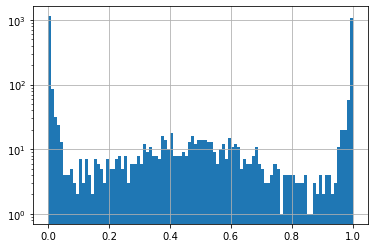

In [80]:
tract_20_10["FRACTION"].hist(bins=100, log=True)

In [13]:
tract_20_10["FRACTION"].describe()
tract_20_10["FRACTION"].isna().sum()
# tract_20_10["AREALAND_PART"].isna().sum()
# tract_20_10["AREALAND_TRACT_20"].isna().sum()
# tract_20_10["AREALAND_PART"].describe()
# tract_20_10["AREALAND_TRACT_20"].describe()

0

In [24]:
dff = pd.read_csv("data/census/all_acs_by_tract_2019.csv", index_col="GEOID")
dff = dff.drop("Unnamed: 0", axis=1)
dff

,NAME,n_total_pop,n_white,n_bachelor,n_workers_16plus,n_drove_alone,median_hh_inc,n_units_tot,n_units_1detached,n_units_1attached
GEOID,,,,,,,,,,
53001950100,"Census Tract 9501, Adams County, Washington",2511,2263,255,1083,766,48561.0,1164,909,14
53001950200,"Census Tract 9502, Adams County, Washington",1630,1449,171,667,476,56734.0,791,659,3
53001950300,"Census Tract 9503, Adams County, Washington",6546,3263,214,2188,1478,43658.0,1827,743,13
53001950400,"Census Tract 9504, Adams County, Washington",3237,1900,186,1204,836,46412.0,1045,687,60
53001950500,"Census Tract 9505, Adams County, Washington",5670,3886,97,2263,1769,51543.0,1781,1256,63
...,...,...,...,...,...,...,...,...,...,...
53077940002,"Census Tract 9400.02, Yakima County, Washington",4607,2364,165,1547,1335,51548.0,1411,1125,39
53077940003,"Census Tract 9400.03, Yakima County, Washington",3315,1377,117,1148,974,49688.0,1095,763,5
53077940004,"Census Tract 9400.04, Yakima County, Washington",6172,3532,102,2222,1646,42775.0,1731,1212,43


In [26]:
53009000200 in dff.index

True